# Retail Sales Store Data Cleaning & Exploratory Data Analysis (EDA)

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
import plotly.io as pio

### Data Loading and Processing

In [2]:
#Load Data
df = pd.read_csv("/retail_store_sales.csv")

In [3]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True


In [4]:
df.shape

(12575, 11)

In [5]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [6]:
df.tail()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True
12574,TXN_2407494,CUST_23,Food,Item_9_FOOD,17.0,3.0,51.0,Cash,Online,2022-08-06,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [8]:
#Checking Null values
null_values = df.isnull().sum()
null_values

,0
Transaction ID,0
Customer ID,0
Category,0
Item,1213
Price Per Unit,609
Quantity,604
Total Spent,604
Payment Method,0
Location,0
Transaction Date,0


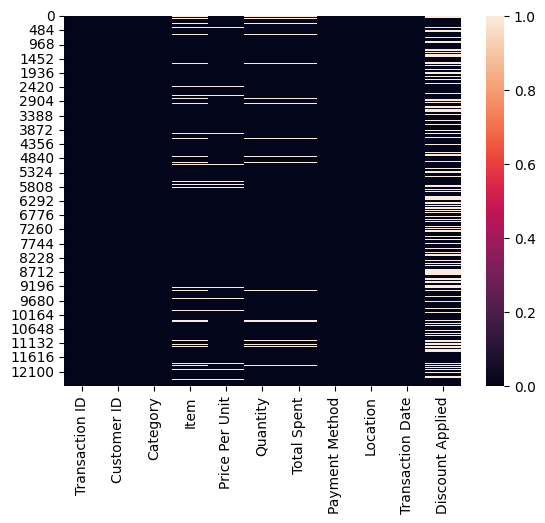

In [9]:
# Visualize Null Values
sns.heatmap(df.isnull())
plt.show()

In [10]:
# Convert Transaction Date datatype into dateTime datatype
df['Transaction Date']=pd.to_datetime(df['Transaction Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    12575 non-null  object        
 1   Customer ID       12575 non-null  object        
 2   Category          12575 non-null  object        
 3   Item              11362 non-null  object        
 4   Price Per Unit    11966 non-null  float64       
 5   Quantity          11971 non-null  float64       
 6   Total Spent       11971 non-null  float64       
 7   Payment Method    12575 non-null  object        
 8   Location          12575 non-null  object        
 9   Transaction Date  12575 non-null  datetime64[ns]
 10  Discount Applied  8376 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 1.1+ MB


# Data Cleaning

### Adding a new column Month and Year

In [12]:
df['Year'] = df['Transaction Date'].dt.year

In [13]:
df["Month"] = df['Transaction Date'].dt.strftime('%B')

In [14]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Year,Month
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,2024,April
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,2023,July
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,2022,October
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN,2022,May
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,2022,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN,2023,September
12571,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False,2022,August
12572,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN,2024,August
12573,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True,2023,December


## Replace all Item code with their actual Item names

In [15]:
allItems = {
    "Item_1_FUR": "Office Chair",
    "Item_2_FUR": "Sofa",
    "Item_3_FUR": "Coffee Table",
    "Item_4_FUR": "Dining Table",
    "Item_5_FUR": "Bookshelf",
    "Item_6_FUR": "Bed Frame",
    "Item_7_FUR": "Wardrobe",
    "Item_8_FUR": "Study Table",
    "Item_9_FUR": "Recliner",
    "Item_10_FUR": "Side Table",
    "Item_11_FUR": "TV Stand",
    "Item_12_FUR": "Dressing Table",
    "Item_13_FUR": "Chest of Drawers",
    "Item_14_FUR": "Ottoman",
    "Item_15_FUR": "Rocking Chair",
    "Item_16_FUR": "Shoe Rack",
    "Item_17_FUR": "Nightstand",
    "Item_18_FUR": "Patio Chair",
    "Item_19_FUR": "Folding Table",
    "Item_20_FUR": "Bean Bag",
    "Item_21_FUR": "Wooden Bench",
    "Item_22_FUR": "Corner Shelf",
    "Item_23_FUR": "Magazine Rack",
    "Item_24_FUR": "Bar Stool",
    "Item_25_FUR": "Accent Chair",
    "Item_1_EHE": "Blender",
    "Item_2_EHE": "Microwave",
    "Item_3_EHE": "Toaster",
    "Item_4_EHE": "Vacuum Cleaner",
    "Item_5_EHE": "Air Purifier",
    "Item_6_EHE": "Electric Kettle",
    "Item_7_EHE": "Rice Cooker",
    "Item_8_EHE": "Iron",
    "Item_9_EHE": "Ceiling Fan",
    "Item_10_EHE": "Table Fan",
    "Item_11_EHE": "Hair Dryer",
    "Item_12_EHE": "Heater",
    "Item_13_EHE": "Humidifier",
    "Item_14_EHE": "Dehumidifier",
    "Item_15_EHE": "Coffee Maker",
    "Item_16_EHE": "Portable AC",
    "Item_17_EHE": "Electric Stove",
    "Item_18_EHE": "Pressure Cooker",
    "Item_19_EHE": "Induction Cooktop",
    "Item_20_EHE": "Water Dispenser",
    "Item_21_EHE": "Hand Blender",
    "Item_22_EHE": "Mixer Grinder",
    "Item_23_EHE": "Sandwich Maker",
    "Item_24_EHE": "Air Fryer",
    "Item_25_EHE": "Juicer",
    "Item_1_BUT": "Chicken Breast",
    "Item_2_BUT": "Chicken Thigh",
    "Item_3_BUT": "Whole Chicken",
    "Item_4_BUT": "Beef Mince",
    "Item_5_BUT": "Beef Steak",
    "Item_6_BUT": "Lamb Chops",
    "Item_7_BUT": "Mutton Curry Cut",
    "Item_8_BUT": "Turkey Breast",
    "Item_9_BUT": "Pork Chops",
    "Item_10_BUT": "Bacon Pack",
    "Item_11_BUT": "Sausages",
    "Item_12_BUT": "Meatballs",
    "Item_13_BUT": "Beef Ribs",
    "Item_14_BUT": "Lamb Leg",
    "Item_15_BUT": "Chicken Wings",
    "Item_16_BUT": "Ham Slices",
    "Item_17_BUT": "Smoked Turkey",
    "Item_18_BUT": "Goat Meat",
    "Item_19_BUT": "Pork Belly",
    "Item_20_BUT": "Ribeye Steak",
    "Item_21_BUT": "Marinated Chicken",
    "Item_22_BUT": "Minced Pork",
    "Item_23_BUT": "Lamb Shank",
    "Item_24_BUT": "Beef Tenderloin",
    "Item_25_BUT": "Premium Wagyu Cut",
    "Item_1_PAT": "Croissant",
    "Item_2_PAT": "Chocolate Croissant",
    "Item_3_PAT": "Muffin",
    "Item_4_PAT": "Cupcake",
    "Item_5_PAT": "Danish Pastry",
    "Item_6_PAT": "Donut",
    "Item_7_PAT": "Eclair",
    "Item_8_PAT": "Brownie",
    "Item_9_PAT": "Macaron",
    "Item_10_PAT": "Cinnamon Roll",
    "Item_11_PAT": "Cheesecake Slice",
    "Item_12_PAT": "Fruit Tart",
    "Item_13_PAT": "Cream Puff",
    "Item_14_PAT": "Lemon Tart",
    "Item_15_PAT": "Apple Pie Slice",
    "Item_16_PAT": "Chocolate Tart",
    "Item_17_PAT": "Choux Pastry",
    "Item_18_PAT": "Tiramisu Slice",
    "Item_19_PAT": "Red Velvet Slice",
    "Item_20_PAT": "Carrot Cake Slice",
    "Item_21_PAT": "Cookie Pack",
    "Item_22_PAT": "Cake Roll",
    "Item_23_PAT": "Mini Pastry Box",
    "Item_24_PAT": "Premium Donut",
    "Item_25_PAT": "French Pastry Box",
    "Item_1_BEV": "Mineral Water",
    "Item_2_BEV": "Sparkling Water",
    "Item_3_BEV": "Cola Drink",
    "Item_4_BEV": "Orange Juice",
    "Item_5_BEV": "Apple Juice",
    "Item_6_BEV": "Lemonade",
    "Item_7_BEV": "Energy Drink",
    "Item_8_BEV": "Iced Tea",
    "Item_9_BEV": "Cold Coffee",
    "Item_10_BEV": "Sports Drink",
    "Item_11_BEV": "Ginger Ale",
    "Item_12_BEV": "Tonic Water",
    "Item_13_BEV": "Grape Juice",
    "Item_14_BEV": "Coconut Water",
    "Item_15_BEV": "Mango Juice",
    "Item_16_BEV": "Herbal Tea",
    "Item_17_BEV": "Green Tea Bottle",
    "Item_18_BEV": "Kombucha",
    "Item_19_BEV": "Pineapple Juice",
    "Item_20_BEV": "Fruit Punch",
    "Item_21_BEV": "Protein Shake",
    "Item_22_BEV": "Milkshake",
    "Item_23_BEV": "Smoothie",
    "Item_24_BEV": "Iced Latte",
    "Item_25_BEV": "Premium Cold Brew",
    "Item_1_MILK": "Full Cream Milk",
    "Item_2_MILK": "Skimmed Milk",
    "Item_3_MILK": "Cheese Block",
    "Item_4_MILK": "Butter",
    "Item_5_MILK": "Yogurt",
    "Item_6_MILK": "Greek Yogurt",
    "Item_7_MILK": "Fresh Cream",
    "Item_8_MILK": "Cottage Cheese",
    "Item_9_MILK": "Chocolate Milk",
    "Item_10_MILK": "Flavored Yogurt",
    "Item_11_MILK": "Whipped Cream",
    "Item_12_MILK": "Buttermilk",
    "Item_13_MILK": "Sour Cream",
    "Item_14_MILK": "Mozzarella",
    "Item_15_MILK": "Parmesan",
    "Item_16_MILK": "Lactose-Free Milk",
    "Item_17_MILK": "Dairy Creamer",
    "Item_18_MILK": "Milk Powder",
    "Item_19_MILK": "Ice Cream Cup",
    "Item_20_MILK": "Ice Cream Family Pack",
    "Item_21_MILK": "Organic Milk",
    "Item_22_MILK": "Fresh Paneer",
    "Item_23_MILK": "Ricotta",
    "Item_24_MILK": "Sweet Condensed Milk",
    "Item_25_MILK": "Evaporated Milk",
    "Item_1_CEA": "Laptop",
    "Item_2_CEA": "Desktop PC",
    "Item_3_CEA": "Keyboard",
    "Item_4_CEA": "Mouse",
    "Item_5_CEA": "Monitor",
    "Item_6_CEA": "Printer",
    "Item_7_CEA": "Scanner",
    "Item_8_CEA": "Webcam",
    "Item_9_CEA": "Headset",
    "Item_10_CEA": "USB Flash Drive",
    "Item_11_CEA": "External Hard Drive",
    "Item_12_CEA": "SSD Drive",
    "Item_13_CEA": "Graphics Card",
    "Item_14_CEA": "Motherboard",
    "Item_15_CEA": "RAM Module",
    "Item_16_CEA": "Power Supply Unit",
    "Item_17_CEA": "Laptop Charger",
    "Item_18_CEA": "HDMI Cable",
    "Item_19_CEA": "Router",
    "Item_20_CEA": "WiFi Range Extender",
    "Item_21_CEA": "Smartwatch",
    "Item_22_CEA": "Bluetooth Speaker",
    "Item_23_CEA": "Earbuds",
    "Item_24_CEA": "Portable Projector",
    "Item_25_CEA": "Tablet",
    "Item_1_FOOD": "Rice",
    "Item_2_FOOD": "Wheat Flour",
    "Item_3_FOOD": "Pasta",
    "Item_4_FOOD": "Noodles",
    "Item_5_FOOD": "Sugar",
    "Item_6_FOOD": "Salt",
    "Item_7_FOOD": "Cooking Oil",
    "Item_8_FOOD": "Spices Mix",
    "Item_9_FOOD": "Oats",
    "Item_10_FOOD": "Cereal",
    "Item_11_FOOD": "Peanut Butter",
    "Item_12_FOOD": "Jam",
    "Item_13_FOOD": "Honey",
    "Item_14_FOOD": "Bread Loaf",
    "Item_15_FOOD": "Tortilla Wraps",
    "Item_16_FOOD": "Tomato Sauce",
    "Item_17_FOOD": "Chili Sauce",
    "Item_18_FOOD": "Pickles",
    "Item_19_FOOD": "Canned Beans",
    "Item_20_FOOD": "Canned Corn",
    "Item_21_FOOD": "Frozen Vegetables",
    "Item_22_FOOD": "Frozen Fries",
    "Item_23_FOOD": "Soup Packet",
    "Item_24_FOOD": "Instant Meals",
    "Item_25_FOOD": "Dry Fruits Mix"
}


In [16]:
df["Item"]=df["Item"].map(allItems)

In [17]:

df['Category'].unique()

array(['Patisserie', 'Milk Products', 'Butchers', 'Beverages', 'Food',
       'Furniture', 'Electric household essentials',
       'Computers and electric accessories'], dtype=object)

Fill Quantity column missing values using the median value

In [18]:
qty_median = df['Quantity'].median()
qty_median

6.0

In [19]:
df['Quantity'].replace(to_replace=np.nan,value = qty_median,inplace=True)

In [20]:
df['Category'].unique()

array(['Patisserie', 'Milk Products', 'Butchers', 'Beverages', 'Food',
       'Furniture', 'Electric household essentials',
       'Computers and electric accessories'], dtype=object)

Find all Category wise Item mode

In [21]:

arr = ['Patisserie', 'Milk Products','Butchers','Beverages', 'Food',
       'Furniture', 'Electric household essentials',
       'Computers and electric accessories']
arr

['Patisserie',
 'Milk Products',
 'Butchers',
 'Beverages',
 'Food',
 'Furniture',
 'Electric household essentials',
 'Computers and electric accessories']

In [22]:
x = []
for i in arr:
    y = df.loc[(df["Category"]== i),"Item"].mode()
    x.append(y)

print(x)

[0    Fruit Tart
Name: Item, dtype: object, 0      Full Cream Milk
1    Lactose-Free Milk
Name: Item, dtype: object, 0    Ribeye Steak
Name: Item, dtype: object, 0    Sparkling Water
Name: Item, dtype: object, 0    Bread Loaf
Name: Item, dtype: object, 0    Accent Chair
Name: Item, dtype: object, 0    Iron
Name: Item, dtype: object, 0    Router
Name: Item, dtype: object]


Fill missing values in the Item column using category-wise mode

In [23]:
arr = ['Patisserie', 'Milk Products','Butchers','Beverages', 'Food',
       'Furniture', 'Electric household essentials',
       'Computers and electric accessories']
for z in arr:
    mode_value = df.loc[(df["Category"]== z),"Item"].mode()
    if not mode_value.empty:
       df.loc[(df["Category"]== z) &(df['Item'].isnull()),"Item"] = mode_value.iloc[0]


In [24]:
df.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Category,0
Item,0
Price Per Unit,609
Quantity,0
Total Spent,604
Payment Method,0
Location,0
Transaction Date,0


Fill missing values in the Price Per Unit column with the help of (Total Spent Divided by Quantity)

In [25]:
df[df['Price Per Unit'].isnull()]

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Year,Month
5,TXN_7482416,CUST_09,Patisserie,Fruit Tart,NaN,10.0,200.0,Credit Card,Online,2023-11-30,NaN,2023,November
11,TXN_5422631,CUST_09,Milk Products,Full Cream Milk,NaN,8.0,52.0,Digital Wallet,In-store,2025-01-12,True,2025,January
17,TXN_9634894,CUST_15,Milk Products,Full Cream Milk,NaN,10.0,275.0,Digital Wallet,Online,2022-04-17,NaN,2022,April
21,TXN_8685338,CUST_15,Milk Products,Full Cream Milk,NaN,3.0,105.0,Credit Card,In-store,2023-10-29,NaN,2023,October
32,TXN_1543244,CUST_20,Food,Bread Loaf,NaN,8.0,196.0,Credit Card,Online,2024-10-25,True,2024,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12435,TXN_5147764,CUST_01,Furniture,Accent Chair,NaN,5.0,32.5,Credit Card,Online,2023-09-06,True,2023,September
12457,TXN_1352194,CUST_17,Electric household essentials,Iron,NaN,4.0,86.0,Credit Card,Online,2023-02-26,NaN,2023,February
12477,TXN_5625684,CUST_22,Computers and electric accessories,Router,NaN,4.0,80.0,Cash,In-store,2022-11-09,True,2022,November
12491,TXN_7894525,CUST_23,Butchers,Ribeye Steak,NaN,1.0,26.0,Credit Card,Online,2023-01-31,True,2023,January


In [26]:
df['Price Per Unit'].fillna(df['Total Spent']/df['Quantity'],inplace=True)

Fill missing values in the Total Spent column with the help of (Price Per Unit multiply by Quantity)

In [27]:
df['Total Spent'].fillna(df['Price Per Unit']*df['Quantity'],inplace=True)

In [28]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,Year,Month
0,TXN_6867343,CUST_09,Patisserie,Cinnamon Roll,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True,2024,April
1,TXN_3731986,CUST_22,Milk Products,Dairy Creamer,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True,2023,July
2,TXN_9303719,CUST_02,Butchers,Meatballs,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False,2022,October
3,TXN_9458126,CUST_06,Beverages,Herbal Tea,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN,2022,May
4,TXN_4575373,CUST_05,Food,Salt,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False,2022,October
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,TXN_9347481,CUST_18,Patisserie,Mini Pastry Box,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,NaN,2023,September
12571,TXN_4009414,CUST_03,Beverages,Sparkling Water,6.5,9.0,58.5,Cash,Online,2022-08-12,False,2022,August
12572,TXN_5306010,CUST_11,Butchers,Mutton Curry Cut,14.0,10.0,140.0,Cash,Online,2024-08-24,NaN,2024,August
12573,TXN_5167298,CUST_04,Furniture,Wardrobe,14.0,6.0,84.0,Cash,Online,2023-12-30,True,2023,December


In [29]:
df['Discount Applied'].mode()

,Discount Applied
0,True


In [30]:
df['Discount Applied'].fillna(True,inplace=True)

# Filling all missing values After no such missing record found

In [31]:
df.isnull().sum()

,0
Transaction ID,0
Customer ID,0
Category,0
Item,0
Price Per Unit,0
Quantity,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,0


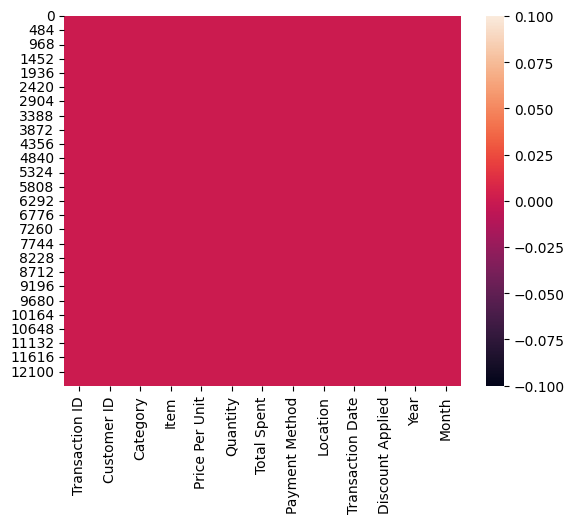

In [32]:
sns.heatmap(df.isnull())

plt.show()

# Exploratory Data Analysis (EDA)

## 🛒 Sales & Revenue Insights

### Categories wise Sales

In [33]:
category_wise_sale = df.groupby("Category")["Total Spent"].sum().sort_values(ascending=False)
category_wise_sale

,Total Spent
Category,
Butchers,218153.0
Electric household essentials,215297.5
Beverages,206854.5
Furniture,205390.0
Food,205225.0
Computers and electric accessories,202023.5
Patisserie,194531.5
Milk Products,189892.0


In [34]:
fig=px.bar(category_wise_sale,title="Categories Wise Sales",color=category_wise_sale.index)
fig.update_layout(
    yaxis_title="Total Sales",
     width=1000,
    height=500
)
pio.show(fig)

fig.write_html("categories.html")

Conclusion:

This analysis show the Categories Wise Sales.Butchers category generates the highest Revenue along with Electrice household essentials Overall, the chart highlights which Category contribute most to total revenue.

## Top 10 best-selling items by total spent

In [35]:
best_selling_item = df.groupby("Item")['Total Spent'].sum().sort_values(ascending=False).head(10)
best_selling_item

,Total Spent
Item,
Accent Chair,44119.0
Ribeye Steak,39587.5
Router,38977.0
Bread Loaf,34447.0
Fruit Tart,33918.5
Iron,31257.0
Sparkling Water,23270.0
Juicer,23083.0
Full Cream Milk,22034.5


In [36]:
#Convert into DataFrame for visulization
itemdf=pd.DataFrame({
    "Items":best_selling_item.index,
    "Total Spent":best_selling_item.values
})

In [37]:
itemdf

,Items,Total Spent
0,Accent Chair,44119.0
1,Ribeye Steak,39587.5
2,Router,38977.0
3,Bread Loaf,34447.0
4,Fruit Tart,33918.5
5,Iron,31257.0
6,Sparkling Water,23270.0
7,Juicer,23083.0
8,Full Cream Milk,22034.5
9,Premium Wagyu Cut,21894.0


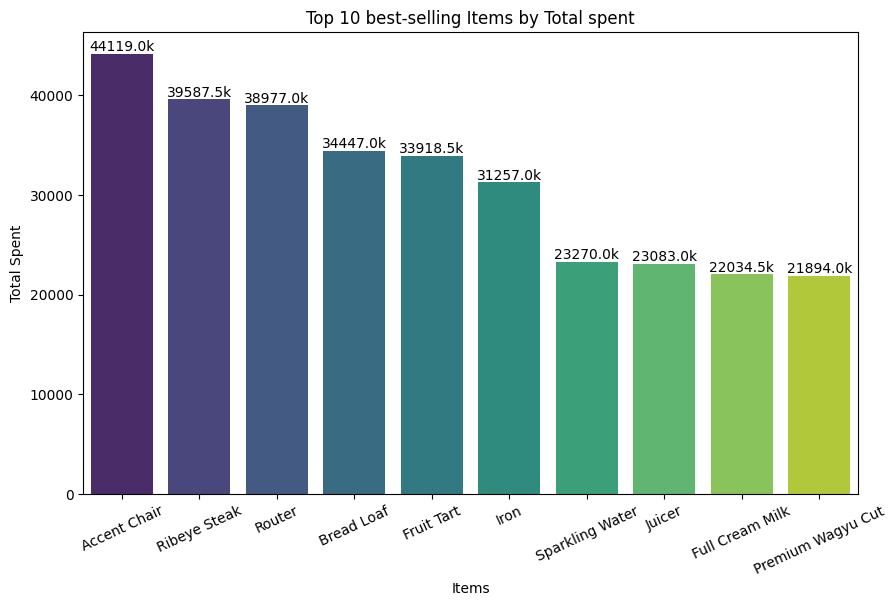

In [38]:
plt.figure(figsize=(10,6))
plt.title("Top 10 best-selling Items by Total spent")
ax =sns.barplot(data=itemdf,x="Items",
                y="Total Spent",
                palette="viridis")
for i in ax.containers:
    ax.bar_label(i,fmt='%.1fk')
plt.xticks(rotation=25)
plt.show()

Conclusion:

This visualization shows the top 10 best-selling items based on total revenue. Accent Chair generates the highest total sales, followed by Ribeye Steak and Router. Among the top 10 items, Full Cream Milk and Premium Wagyu Cut have the lowest total sales. Overall, the chart highlights which items contribute most to total revenue.

# Do discounted transactions result in higher total spending?

In [39]:
highest_discount_applied = df.groupby('Discount Applied')['Total Spent'].sum()
highest_discount_applied

,Total Spent
Discount Applied,
False,543722.0
True,1093645.0


In [90]:
fig2=px.bar(highest_discount_applied,title="Total Spending by Discount Applied")
fig2.update_layout(
   width= 800,
   height=500,
   yaxis_title="Total Spent"
)
pio.show(fig2)
fig2.write_html("Discount.html")

Conclusion:

Discounted transactions contribute more to total revenue than non-discounted transactions. However, this may be influenced by the higher number of discounted purchases rather than higher spending per transaction.

## 👥 Customer Behavior Insights

# Top 10 high-value customers based on total spent

In [41]:
high_value_customers = df.groupby('Customer ID')['Total Spent'].sum().sort_values(ascending=False).head(10)
high_value_customers

,Total Spent
Customer ID,
CUST_24,71890.0
CUST_08,70822.5
CUST_05,70631.5
CUST_13,68904.0
CUST_23,68554.0
CUST_16,68225.5
CUST_10,66419.5
CUST_22,65980.5
CUST_15,65601.5


In [91]:
fig3=px.bar(high_value_customers,color=high_value_customers.index)
fig3.update_layout(
    title= "Top 10 high-value customers based on total spent",
    xaxis_title ="Customer ID",
    yaxis_title ="Total Spent",
    width=1000,
    height=500
)
pio.show(fig3)
fig3.write_html("topcustomers.html")

Conclusion:

This analysis identifies the top 10 high-value customers based on total spending. Customer CUST_24 spent the most, followed closely by CUST_08 and CUST_05. The differences in spending among these top customers are relatively small, highlighting a group of customers who contribute significantly to total revenue.


## Which Location are the Highest Transaction?

In [43]:
location_based = df['Location'].value_counts()
location_based

,count
Location,
Online,6354
In-store,6221


In [92]:

fig4 = px.pie(location_based,values=location_based.values,names=location_based.index,
             title="Transaction by Location",width=600, hole=0.3)
pio.show(fig4)
fig4.write_html("location.html")


Conclusion:

This analysis shows that Online Transaction are slightly Higher than In-store transaction Online Transaction count are 6354 and In-store Transaction count are 6221.This indicates that both channels are popular,but Online transaction has a small edge on transaction count.

## Customer Spending Distribution by Payment Method

In [45]:
high_vaulet_spend = df.groupby('Payment Method')['Total Spent'].sum()
high_vaulet_spend

,Total Spent
Payment Method,
Cash,567275.0
Credit Card,534475.0
Digital Wallet,535617.0


In [93]:
from matplotlib.axis import XAxis
fig5 =px.bar(high_vaulet_spend,color=high_vaulet_spend.index,
            title='Customer Spending Distribution by Payment Method')
fig5.update_layout(
    yaxis_title ="Total Spent",
    width=800,   # pixels
    height=500   # pixels
)
pio.show(fig5)
fig5.write_html("paymentMethod.html")

Conclusion:

This analysis shows that customer spending varies by payment method. While cash is still commonly used, credit cards and digital wallets are also popular payment methods and account for a significant share of customer spending.

## 💳 Payment Method Insights

## Payment Method Distribution Across Transactions

In [47]:
payment_transaction = df['Payment Method'].value_counts()
payment_transaction

,count
Payment Method,
Cash,4310
Digital Wallet,4144
Credit Card,4121


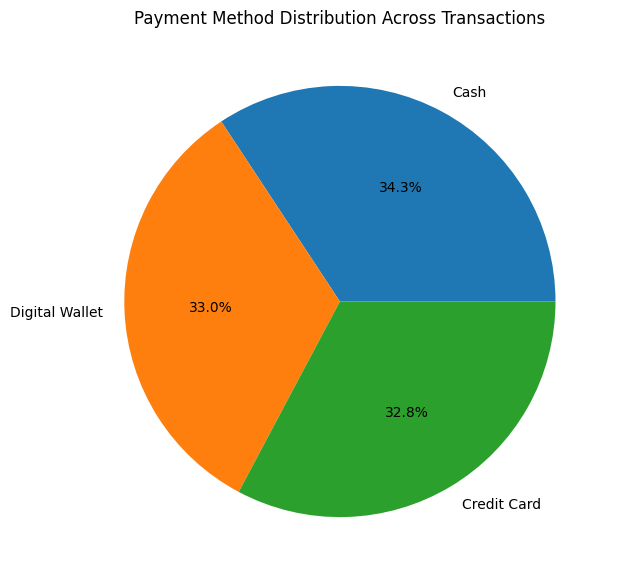

In [48]:
plt.figure(figsize=(8,7))
plt.title("Payment Method Distribution Across Transactions")
plt.pie(payment_transaction,autopct='%1.1f%%',labels=payment_transaction.index)
plt.show()

Conclusion:

This Analysis shows that the Payment Method Distribution on across transaction Cash show the 34% of transaction  Digital Wallet and Credit Card are respectively 33% and 32% persent on total transaction

## Distribution of Discounted Transactions by Payment Method

In [49]:
discount_apply =df.groupby('Payment Method')['Discount Applied'].sum()
discount_apply

,Discount Applied
Payment Method,
Cash,2932
Credit Card,2762
Digital Wallet,2724


In [50]:
discount_rate =(discount_apply.values/payment_transaction.values)*100

In [51]:
discount_rate

array([68.02784223, 66.65057915, 66.10046105])

In [52]:
df2=pd.DataFrame({
    "Payment Method":discount_apply.index,
    "Discount Rate":discount_rate
})

In [53]:
df2

,Payment Method,Discount Rate
0,Cash,68.027842
1,Credit Card,66.650579
2,Digital Wallet,66.100461


In [94]:
fig6 = px.pie(df2,values=discount_apply.values,color=discount_apply.index,
              color_discrete_map={'Cash':'darkblue',
                                 'Credit Card':'cyan',
                                 'Digital Wallet':'royalblue'
                          },width=600,names=discount_apply.index)
fig6.update_layout(title="Distribution of Discounted Transactions by Payment Method")
pio.show(fig6)
fig6.write_html("disct_trans.html")

Conclusion:

Cash payments account for the highest number of discounted transactions, followed closely by credit cards and digital wallets, indicating that discounts are fairly evenly distributed across payment methods.

## 📦 Product Performance Insights

## Top 10 Items are best-selling by quantity

In [55]:
best_selling_item = df.groupby("Item")["Quantity"].sum().sort_values(ascending=False).head(10)
best_selling_item

,Quantity
Item,
Bread Loaf,1514.0
Fruit Tart,1495.0
Sparkling Water,1486.0
Router,1484.0
Full Cream Milk,1454.0
Ribeye Steak,1427.0
Iron,1404.0
Accent Chair,1391.0
Lactose-Free Milk,627.0


In [56]:
import plotly.graph_objects as go

In [95]:

fig7 = go.Figure(go.Bar(
    y =best_selling_item.index,
    x =best_selling_item.values,
    orientation="h",
    marker_color='lightslategrey',

))
fig7.update_layout(yaxis=dict(autorange="reversed"),
                  title='Items are best-selling by quantity',
    xaxis_title = "Total Quantity" ,
    yaxis_title ="Items",
    width=800,
    height=500,
)

fig7.show()
fig7.write_html("bestItem_charts.html")

Conclusion:

This analysis highlights the top 10 best-selling items based on total quantity sold. Bread Loaf has the highest sales volume, followed by Fruit Tart and Sparkling Water. Other items such as Router, Full Cream Milk, and Ribeye Steak also show strong sales performance. Overall, these products represent the most frequently purchased items, indicating high customer demand.

## Categories with the highest number of discounted transactions

In [58]:

dict_tran_cat = df.groupby('Category')['Discount Applied'].count()

dict_tran_cat

,Discount Applied
Category,
Beverages,1567
Butchers,1568
Computers and electric accessories,1558
Electric household essentials,1591
Food,1588
Furniture,1591
Milk Products,1584
Patisserie,1528


In [97]:
fig8=px.bar(dict_tran_cat,color=dict_tran_cat.index)
fig8.update_layout(
    title= "Categories with the highest number of discounted transactions",
    xaxis_title ="Categories",
    yaxis_title ="Discounted Transactions",
    width=1000,
    height=500
)
pio.show(fig8)
fig8.write_html("catg_dic.html")

Conclusion:

This analysis shows that the Categories with the highest discounted transaction.Furniture are the Highest discounted transaction category.It is followed by Electric household essentials and Beverages,which also show a high level of discounted usage.Overall discount play a important role in driving sale across these top categories,while other categories continue to show steady performance.

## Item-Level Price and Quantity Analysis

In [60]:
products = df['Item'].unique()


In [61]:
arr = []
for item in products:
    allItems = df.loc[df['Item'] == item,'Price Per Unit'].median()
    arr.append(allItems)
item_avg_price = arr

In [62]:
quantity = df.groupby("Item")["Quantity"].sum()
quantity

,Quantity
Item,
Accent Chair,1391.0
Air Fryer,80.0
Air Purifier,421.0
Apple Juice,47.0
Apple Pie Slice,331.0
...,...
Whipped Cream,574.0
Whole Chicken,409.0
WiFi Range Extender,415.0


In [63]:
avg_price = {
    "Product":quantity.index,
    "Average Price Per Unit":item_avg_price,
    "Quantity":quantity.values
}
avg_product_data = pd.DataFrame(avg_price)

In [64]:
avg_product_data

,Product,Average Price Per Unit,Quantity
0,Accent Chair,18.5,1391.0
1,Air Fryer,29.0,80.0
2,Air Purifier,21.5,421.0
3,Apple Juice,27.5,47.0
4,Apple Pie Slice,12.5,331.0
...,...,...,...
195,Whipped Cream,27.5,574.0
196,Whole Chicken,32.0,409.0
197,WiFi Range Extender,24.5,415.0
198,Wooden Bench,8.0,383.0


## 💰 Price vs Quantity Analysis: High-Priced Products with Low Sales Volume

In [65]:
price_thershold=avg_product_data['Average Price Per Unit'].quantile(0.80)
price_thershold

np.float64(33.800000000000026)

In [66]:
quantity_thershold =avg_product_data['Quantity'].quantile(0.20)
quantity_thershold

np.float64(155.4)

Filter high-price, low-volume items

In [67]:
high_price_low_volume =avg_product_data[
    (avg_product_data['Average Price Per Unit']>= price_thershold)
    &(avg_product_data['Quantity'] <= quantity_thershold)]

In [68]:
high_price_low_volume

,Product,Average Price Per Unit,Quantity
9,Beef Mince,36.5,153.0
28,Chest of Drawers,41.0,40.0
44,Cooking Oil,38.0,122.0
63,Evaporated Milk,35.0,49.0
125,Muffin,41.0,128.0
183,Tiramisu Slice,41.0,120.0
187,Tortilla Wraps,35.0,101.0


In [98]:
fig9 = px.scatter(high_price_low_volume, x='Average Price Per Unit', y='Quantity',
                 title='High-Priced Products with Low Sales Volume')
fig9.update_layout(
    width=800,
    height=500
)
pio.show(fig9)
fig9.write_html("salesvolume.html")

Correlation approach

In [70]:
high_price_low_volume_relation = high_price_low_volume[['Average Price Per Unit', 'Quantity']].corr()
high_price_low_volume_relation

,Average Price Per Unit,Quantity
Average Price Per Unit,1.00000,0.04485
Quantity,0.04485,1.00000


Conclusion:

This analysis points out the products which fall in the top 20% regarding price and the bottom 20% regarding the quantity of sales. Data revealed that products which have high prices tend to have small sales. Yet this is not the general situation for all products. This means that other variables influence the quantity of sales.

## 💰 Price vs Quantity Analysis: Low-Priced Products with High Sales Volume

In [71]:
low_price_thershold =avg_product_data['Average Price Per Unit'].quantile(0.20)
low_quantity_thershold =avg_product_data['Quantity'].quantile(0.80)

In [72]:
low_price_thershold

np.float64(12.200000000000006)

In [73]:
low_quantity_thershold

np.float64(483.0)

In [74]:
low_price_high_volume = avg_product_data[(avg_product_data['Average Price Per Unit']<=low_price_thershold)
&
(avg_product_data['Quantity']>=low_quantity_thershold)]

In [75]:
low_price_high_volume_relation = low_price_high_volume.sort_values(by=['Average Price Per Unit','Quantity'],ascending=[True,False])
low_price_high_volume

,Product,Average Price Per Unit,Quantity
6,Bar Stool,5.0,536.0
15,Bookshelf,6.5,581.0
98,Juicer,6.5,563.0
113,Meatballs,5.0,496.0
121,Monitor,6.5,558.0
174,Sparkling Water,11.0,1486.0
177,Study Table,8.0,510.0


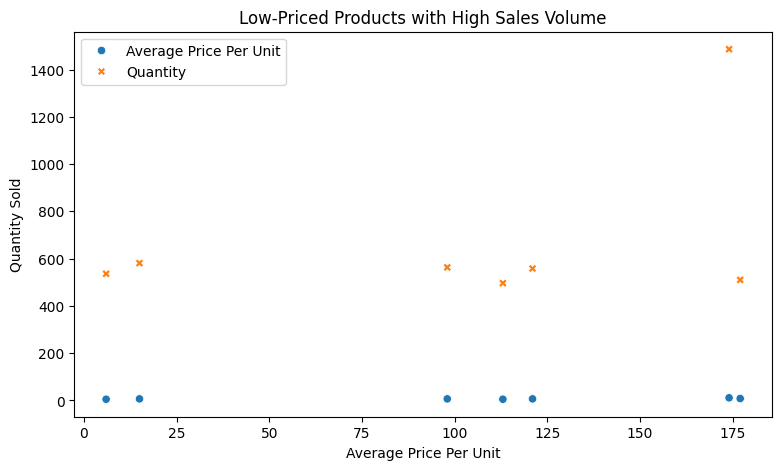

In [76]:
plt.figure(figsize=(9,5))
sns.scatterplot(low_price_high_volume_relation)
plt.title("Low-Priced Products with High Sales Volume")
plt.xlabel("Average Price Per Unit")
plt.ylabel("Quantity Sold")
plt.show()

Conclusion:

It is clear from this analysis that many low-priced items fall in the high sales category. This indicates that it is possible that as prices are lowered, sales volumes can increase. However, this is evident for certain categories and not others.

# 📅 Time-Based Insights

## 📈 Year-wise Sales Performance Analysis

In [77]:
year_sales = df.groupby('Year')['Total Spent'].sum()
year_sales

,Total Spent
Year,
2022,540602.5
2023,515501.0
2024,554296.0
2025,26967.5


In [99]:
fig10 = px.bar(year_sales,color=year_sales.index,title="Year-Wise Total Sales")
fig10.update_layout(
    yaxis_title ="Total Sales Amount",
    width=800,
    height=500
)

pio.show(fig10)
fig10.write_html("totalSales.html")

Conclusion:

Sales peaked in 2024, showing the strongest annual performance. While 2025 currently shows lower sales figures, this is due to incomplete data as the year is still ongoing and should not be interpreted as a decline in performance.

# 📊 Transaction Volume Analysis by Month

In [79]:
month_spent = df.groupby('Month')['Total Spent'].count()
month_spent

,Total Spent
Month,
April,996
August,1039
December,1033
February,965
January,1361
July,1089
June,1038
March,1019
May,1033


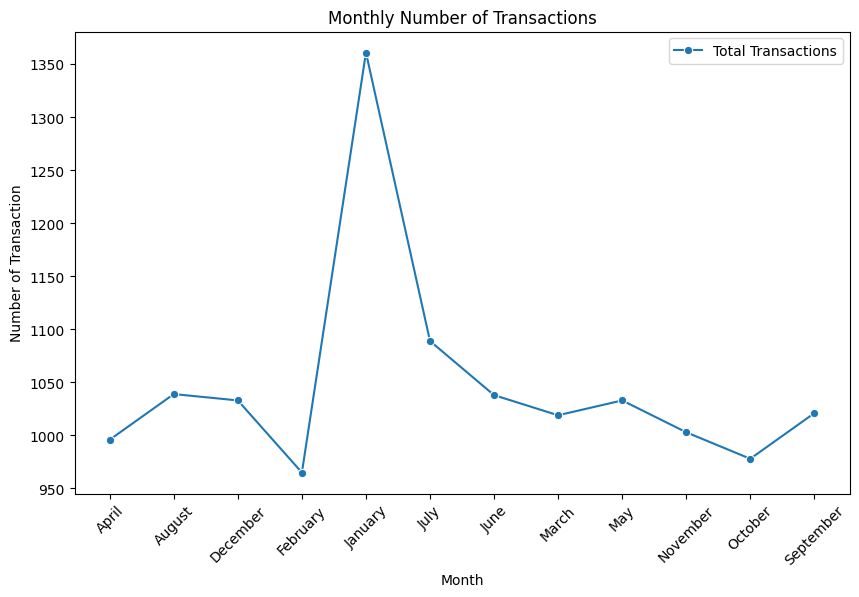

In [80]:

plt.figure(figsize=(10,6))
sns.lineplot(month_spent,label="Total Transactions",marker="o")
plt.title("Monthly Number of Transactions")
plt.ylabel("Number of Transaction")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Conclusion:

January recorded the highest number of transactions, indicating strong customer activity at the start of the year. Transaction volumes remain relatively stable across other months, with a slight dip observed in February and October.

# Which months consistently show higher sales and Transactions

In [81]:
monthly_pre=(df.groupby(['Year','Month'])['Total Spent'].agg(
               total_sum='sum',
               total_trans='count').reset_index())

In [82]:
#Month on a Rank
monthly_pre['Rank']=(
    monthly_pre.groupby("Year")['total_sum']
    .rank(method='dense',ascending=False)
)

In [83]:
monthly_pre

,Year,Month,total_sum,total_trans,Rank
0,2022,April,42584.0,346,9.0
1,2022,August,43415.5,347,7.0
2,2022,December,41507.0,309,11.0
3,2022,February,46268.5,331,4.0
4,2022,January,56271.5,390,1.0
5,2022,July,47453.5,371,3.0
6,2022,June,44481.0,338,6.0
7,2022,March,43225.0,353,8.0
8,2022,May,42066.5,330,10.0
9,2022,November,45366.5,354,5.0


In [84]:
#Filter months
top3_month = monthly_pre[monthly_pre['Rank']<=3]
top3_month

,Year,Month,total_sum,total_trans,Rank
4,2022,January,56271.5,390,1.0
5,2022,July,47453.5,371,3.0
11,2022,September,47541.5,348,2.0
14,2023,December,45406.0,348,3.0
16,2023,January,49354.5,373,1.0
17,2023,July,48191.5,375,2.0
24,2024,April,48524.0,327,3.0
26,2024,December,50692.5,376,2.0
28,2024,January,51043.5,385,1.0
36,2025,January,26967.5,213,1.0


In [85]:
consistent_month=(
    top3_month.groupby("Month")
    .agg(
        time_in_top=("Year","count"),
        total_spent=("total_sum","sum"),
        avg_transaction=("total_trans","mean")
    ).sort_values(by="total_spent",ascending=False)
)

In [86]:
consistent_month

,time_in_top,total_spent,avg_transaction
Month,,,
January,4,183637.0,340.25
December,2,96098.5,362.00
July,2,95645.0,373.00
April,1,48524.0,327.00
September,1,47541.5,348.00


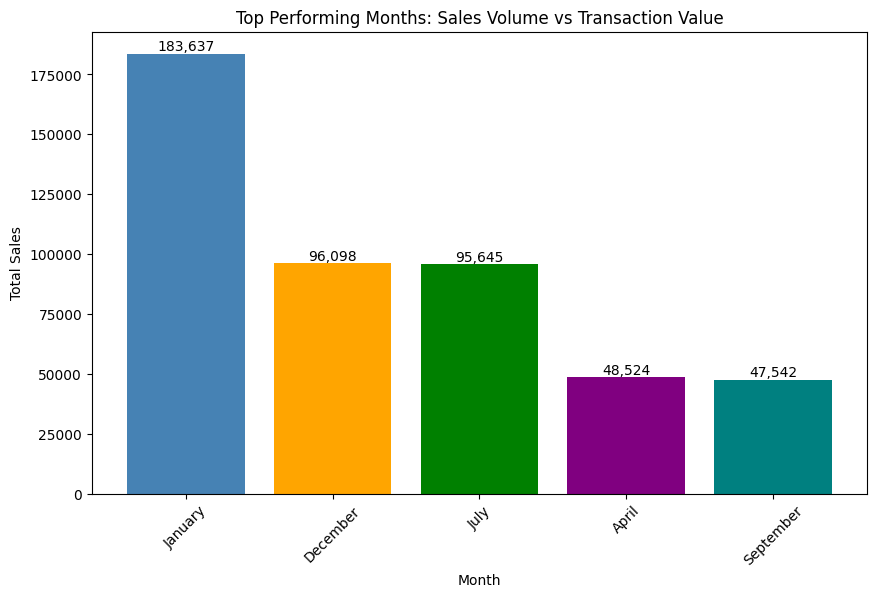

In [87]:
# plt.figure(figsize=(9,5))
months = consistent_month.index
total_spent = consistent_month['total_spent']
# Bar chart → Total Sales
colors = ['steelblue', 'orange', 'green', 'purple', 'teal']
fig, ax = plt.subplots(figsize=(10, 6))
grph = ax.bar(months,total_spent,color=colors)
ax.bar_label(grph, fmt='{:,.0f}')

# Labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Top Performing Months: Sales Volume vs Transaction Value')
plt.xticks(rotation=45)
plt.show()

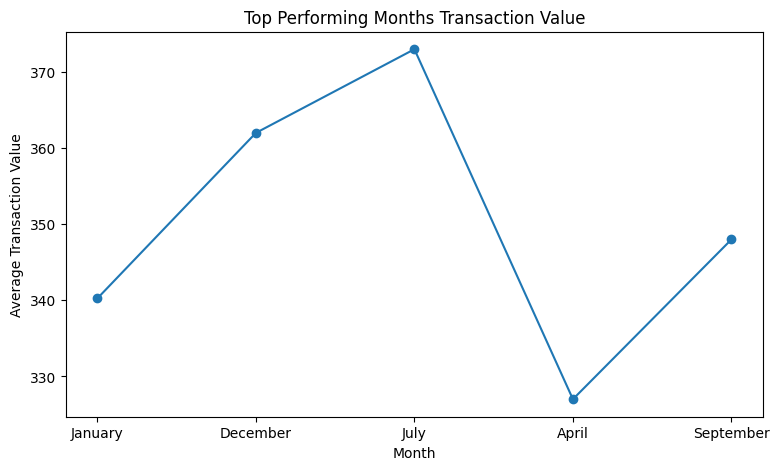

In [88]:
# Line chart → Average Transaction Value
avg_transaction = consistent_month['avg_transaction']
plt.figure(figsize=(9,5))
plt.plot(months, avg_transaction, marker='o')
plt.title('Top Performing Months Transaction Value')
plt.xlabel('Month')
plt.ylabel('Average Transaction Value')
plt.show()

Conclusion:

January is the most consistently high-performing month by total revenue, while July and December show stronger average transaction values, indicating higher per-purchase spending during these periods.

# Final Conclusion:



This EDA project explores customer transactions to uncover sales and spending patterns over time. The analysis reveals clear seasonal trends, with January showing the highest total sales and transaction volume, while some other months perform lower despite having higher average transaction values. These insights highlight how customer behavior changes throughout the year. Overall, this project demonstrates how data cleaning, aggregation, and visualization can turn raw transactional data into meaningful business insights that support better decision-making in marketing, inventory planning, and sales strategy.

In [89]:
df.to_csv("Clean_retail_store.csv",index=False)